## Introduction to NumPy

In [2]:
import numpy as np

In [4]:
## Exercice 1
l = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
even_numbers = l[l % 2 == 0]
print(even_numbers)

[0 2 4 6 8]


In [6]:
## Exercice 2
new_matrix = np.reshape(l, (2,5))
new_matrix

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [8]:
## Exercice 3
u = np.random.uniform(0,1,100)
print(u)
n = np.random.normal(0, 1, 100)
print(n)

[0.3783072  0.23051039 0.60665597 0.19458561 0.97070101 0.57832775
 0.59500914 0.79580744 0.86617634 0.82238561 0.20740527 0.2672606
 0.05670303 0.00788066 0.25882373 0.63332919 0.64091584 0.34586257
 0.93586375 0.18717971 0.01287252 0.23916766 0.10181059 0.48643352
 0.36553129 0.36258876 0.19121426 0.91082593 0.05563569 0.67575531
 0.21651642 0.14276252 0.99000389 0.90508481 0.83573281 0.06250072
 0.86669643 0.20770813 0.13769615 0.78310501 0.63040457 0.88857465
 0.26876399 0.57814655 0.62792783 0.6703138  0.06334464 0.45246689
 0.3336043  0.95265934 0.81754556 0.95178583 0.82569247 0.57928331
 0.23714551 0.85278289 0.35049578 0.5405708  0.76663618 0.73717722
 0.65182982 0.78759425 0.7585401  0.28776117 0.92533357 0.67232218
 0.74800535 0.77460921 0.20746114 0.38949196 0.79284686 0.80278985
 0.0649596  0.89678526 0.96706759 0.07099262 0.91399231 0.98274924
 0.47554318 0.28953252 0.59404386 0.1757025  0.57004177 0.5383265
 0.69102625 0.01032864 0.71688423 0.27687965 0.70706928 0.764949

In [9]:
## Exercice 4
M = np.array([[1,2,3], [4,5,6], [7,8,9]])
M.transpose()

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [10]:
## Exercice 5

M = np.array([[1,2,3], [4,5,6], [7,8,9]])
eigenvalues, eigenvectors = np.linalg.eig(M)

D = np.diag(eigenvalues)
P = eigenvectors
P_inv = np.linalg.inv(P)

M_reconstructed = P @ D @ P_inv
M_reconstructed

array([[1., 2., 3.],
       [4., 5., 6.],
       [7., 8., 9.]])

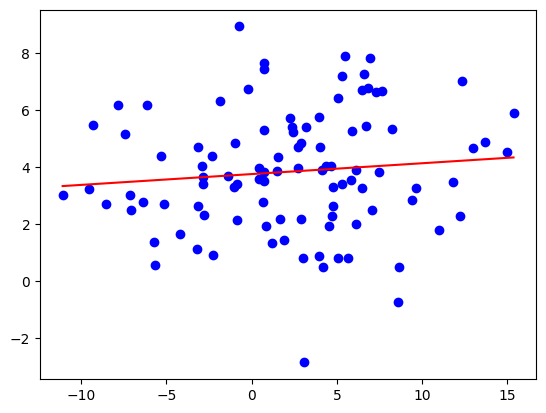

In [3]:
## Exercice 6
import numpy as np
from matplotlib import pyplot as plt

X = np.genfromtxt("linreg_data.csv", delimiter=",", dtype=np.float64)
A = np.stack(
    [
        np.ones(X.shape[0]),
        X[:,0]
    ],
    axis=1
)
beta = np.linalg.inv(A.T @ A) @ A.T @ X[:,1]

x_domain = np.arange(X[:,0].min(), X[:,0].max(), 1 / X.shape[0])
f = lambda x: beta.dot([1, x])

plt.figure(0)
plt.scatter(X[:,0], X[:,1], color="blue")
plt.plot(x_domain, np.vectorize(f)(x_domain), color="red")

In [34]:
## Exercise 7

import numpy as np

S_0 = 100       
K = 105
T = 1
r = 0.05
sigma = 0.2
N = 10000
num_steps = 252

dt = T / num_steps

S_paths = np.zeros((N, num_steps + 1))
S_paths[:, 0] = S_0

for t in range(1, num_steps + 1):
    Z = np.random.standard_normal(N)
    S_paths[:, t] = S_paths[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

C = np.exp(-r * T) * np.maximum(S_paths[:, -1] - K, 0).mean()
C

8.291747983994327

## Introduction to Polars

In [4]:
pip install polars

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 54.3 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
import polars as pl

# Creating a Pandas DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Salary': [50000, 60000, 70000]
}

df = pl.DataFrame(data)

# Reaching elements in a dataframe
print(df)
print("--------------------")
print(df[1])
print("--------------------")
print(df.row(1))
print("--------------------")
print(df[1]["Name"])


shape: (3, 3)
┌─────────┬─────┬────────┐
│ Name    ┆ Age ┆ Salary │
│ ---     ┆ --- ┆ ---    │
│ str     ┆ i64 ┆ i64    │
╞═════════╪═════╪════════╡
│ Alice   ┆ 25  ┆ 50000  │
│ Bob     ┆ 30  ┆ 60000  │
│ Charlie ┆ 35  ┆ 70000  │
└─────────┴─────┴────────┘
--------------------
shape: (1, 3)
┌──────┬─────┬────────┐
│ Name ┆ Age ┆ Salary │
│ ---  ┆ --- ┆ ---    │
│ str  ┆ i64 ┆ i64    │
╞══════╪═════╪════════╡
│ Bob  ┆ 30  ┆ 60000  │
└──────┴─────┴────────┘
--------------------
('Bob', 30, 60000)
--------------------
shape: (1,)
Series: 'Name' [str]
[
	"Bob"
]


In [32]:
# Reading csv file
df_stocks = pl.read_csv("all_stocks_5yr.csv")

# Displaying samples of data
display(df_stocks.head()) # displaying the first 5 rows
display(df_stocks.tail(3)) # Displaying the last 3 rows
print(df_stocks.dtypes)

# Counting the number of rows
print("##########################################################")
print(f"The number of (rows, columns) in our dataframe: {df_stocks.shape}")
print(f"The number of non null elements in every column: {df_stocks.count()}")

# Displaying statistical information about our data
print("##########################################################")
display(df_stocks.describe())
print(f"The first date in the data: {df_stocks['date'].min()}")
print(f"The last date in the data: {df_stocks['date'].max()}")
print(f"The different stocks' names: {df_stocks['Name'].unique()}")
print(f"The number of different stocks: {len(df_stocks['Name'].unique())}")

# Explore null values
print("##########################################################")
for col in df_stocks.columns:
    print(f"The number of null values in the column {col}: {df_stocks[col].is_null().sum()}") 
    
display(df_stocks.filter(pl.any_horizontal(pl.all().is_null())))

date,open,high,low,close,volume,Name
str,f64,f64,f64,f64,i64,str
"""2013-02-08""",15.07,15.12,14.63,14.75,8407500,"""AAL"""
"""2013-02-11""",14.89,15.01,14.26,14.46,8882000,"""AAL"""
"""2013-02-12""",14.45,14.51,14.1,14.27,8126000,"""AAL"""
"""2013-02-13""",14.3,14.94,14.25,14.66,10259500,"""AAL"""
"""2013-02-14""",14.94,14.96,13.16,13.99,31879900,"""AAL"""


date,open,high,low,close,volume,Name
str,f64,f64,f64,f64,i64,str
"""2018-02-05""",76.64,76.92,73.18,73.83,2962031,"""ZTS"""
"""2018-02-06""",72.74,74.56,72.13,73.27,4924323,"""ZTS"""
"""2018-02-07""",72.7,75.0,72.69,73.86,4534912,"""ZTS"""


[String, Float64, Float64, Float64, Float64, Int64, String]
##########################################################
The number of (rows, columns) in our dataframe: (619040, 7)
The number of non null elements in every column: shape: (1, 7)
┌────────┬────────┬────────┬────────┬────────┬────────┬────────┐
│ date   ┆ open   ┆ high   ┆ low    ┆ close  ┆ volume ┆ Name   │
│ ---    ┆ ---    ┆ ---    ┆ ---    ┆ ---    ┆ ---    ┆ ---    │
│ u32    ┆ u32    ┆ u32    ┆ u32    ┆ u32    ┆ u32    ┆ u32    │
╞════════╪════════╪════════╪════════╪════════╪════════╪════════╡
│ 619040 ┆ 619029 ┆ 619032 ┆ 619032 ┆ 619040 ┆ 619040 ┆ 619040 │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┘
##########################################################


statistic,date,open,high,low,close,volume,Name
str,str,f64,f64,f64,f64,f64,str
"""count""","""619040""",619029.0,619032.0,619032.0,619040.0,619040.0,"""619040"""
"""null_count""","""0""",11.0,8.0,8.0,0.0,0.0,"""0"""
"""mean""",null,83.023334,83.778311,82.256096,83.043763,4.3218e6,null
"""std""",null,97.378769,98.207519,96.507421,97.389748,8.6936e6,null
"""min""","""2013-02-08""",1.62,1.69,1.5,1.59,0.0,"""A"""
"""25%""",null,40.22,40.62,39.83,40.245,1.070325e6,null
"""50%""",null,62.59,63.15,62.02,62.62,2.082097e6,null
"""75%""",null,94.37,95.18,93.54,94.41,4.284507e6,null
"""max""","""2018-02-07""",2044.0,2067.99,2035.11,2049.0,6.1823763e8,"""ZTS"""


The first date in the data: 2013-02-08
The last date in the data: 2018-02-07
The different stocks' names: shape: (505,)
Series: 'Name' [str]
[
	"PG"
	"NAVI"
	"SWK"
	"ANDV"
	"WFC"
	…
	"HSY"
	"CSX"
	"SBUX"
	"ADP"
	"FAST"
]
The number of different stocks: 505
##########################################################
The number of null values in the column date: 0
The number of null values in the column open: 11
The number of null values in the column high: 8
The number of null values in the column low: 8
The number of null values in the column close: 0
The number of null values in the column volume: 0
The number of null values in the column Name: 0


date,open,high,low,close,volume,Name
str,f64,f64,f64,f64,i64,str
"""2017-07-26""",null,null,null,69.0842,3,"""BHF"""
"""2015-07-17""",null,88.76,88.24,88.72,2056819,"""DHR"""
"""2016-01-12""",null,null,null,88.55,0,"""DHR"""
"""2015-07-17""",null,48.49,47.85,47.92,1246786,"""ES"""
"""2016-07-01""",null,null,null,49.54,0,"""FTV"""
…,…,…,…,…,…,…
"""2016-01-12""",null,null,null,52.43,0,"""O"""
"""2015-06-09""",null,null,null,526.09,12135,"""REGN"""
"""2016-04-07""",null,null,null,41.56,0,"""UA"""


In [60]:

# The date column should be of the `datetime` type.
#df_stocks = df_stocks.with_columns(pl.col('date').str.to_datetime("%Y-%m-%d"))

# The analysis will be conducted from the beginning of 2014 until the end of 2017.
df_stocks = df_stocks.filter((df_stocks["date"].dt.year() <= 2017) & (df_stocks["date"].dt.year() >= 2014))


# If the open price is missing, it should be filled with the close price of the previous day.
df_stocks = (
    df_stocks.sort(['Name', 'date'])  
    .with_columns(
        pl.col("close").shift(1).over("Name").alias("close_lagged")  # Create a lag column
    )
)
df_stocks = df_stocks.with_columns(
    pl.col("open").fill_null(pl.col("close_lagged")).alias("open")
).drop(pl.col("close_lagged"))



df_stocks = df_stocks.with_columns(pl.col("high").fill_null(pl.max_horizontal(pl.col("close"), pl.col("open"))))

df_stocks = df_stocks.with_columns(pl.col("low").fill_null(pl.min_horizontal(pl.col("close"), pl.col("open"))))

display(df_stocks.filter(pl.any_horizontal(pl.all().is_null())))

date,open,high,low,close,volume,Name
datetime[μs],f64,f64,f64,f64,i64,str
2016-07-01 00:00:00,null,49.54,49.54,49.54,0,"""FTV"""
2016-04-07 00:00:00,null,41.56,41.56,41.56,0,"""UA"""


In [71]:
## display the mean of close price by YYYY-mm for the stock AAL

# create a new column containing the year and the month YYYY-mm
df_stocks = df_stocks.with_columns(pl.concat_str([pl.col("date").dt.year(), pl.col("date").dt.month().cast(pl.Utf8).str.zfill(2)], separator="-").alias("year_month"))
# filter on AAL stock and group by the new column with computing the average of the column close
mean_values = df_stocks.filter(pl.col("Name") == "AAL").group_by("year_month").agg(pl.col("close").mean().alias("mean_close"))
display(mean_values)

mean_sum_values = df_stocks.group_by(["year_month", "Name"]).agg([pl.mean("close"), pl.sum("volume")])
display(mean_sum_values)

year_month,Name,close,volume
str,str,f64,i64
"""2015-11""","""EXPD""",49.20125,28049704
"""2017-01""","""RHT""",73.7695,39446631
"""2014-07""","""GM""",36.814545,305523210
"""2017-12""","""BHGE""",31.217,107551865
"""2014-07""","""EQIX""",212.887273,13169131
…,…,…,…
"""2017-07""","""WBA""",78.7185,107617807
"""2017-04""","""CI""",152.841579,21861744
"""2016-01""","""AIV""",38.642105,28213329


In [73]:
## joining the stocks dataframe to another one to have more information about the stocks

df_stocks_info = pl.read_csv("stock_info.csv")
df_stocks_enriched = df_stocks.join(df_stocks_info, how="left", left_on="Name", right_on="abbreviation")
display(df_stocks_enriched)

date,open,high,low,close,volume,Name,year_month,company_name,sector,country
datetime[μs],f64,f64,f64,f64,i64,str,str,str,str,str
2014-01-02 00:00:00,57.1,57.1,56.15,56.21,1916160,"""A""","""2014-01""","""Agilent Technologies, Inc.""","""Healthcare""","""United States"""
2014-01-03 00:00:00,56.39,57.345,56.26,56.92,1866651,"""A""","""2014-01""","""Agilent Technologies, Inc.""","""Healthcare""","""United States"""
2014-01-06 00:00:00,57.4,57.7,56.56,56.64,1777472,"""A""","""2014-01""","""Agilent Technologies, Inc.""","""Healthcare""","""United States"""
2014-01-07 00:00:00,56.95,57.63,56.93,57.45,1463208,"""A""","""2014-01""","""Agilent Technologies, Inc.""","""Healthcare""","""United States"""
2014-01-08 00:00:00,57.33,58.54,57.17,58.39,2659468,"""A""","""2014-01""","""Agilent Technologies, Inc.""","""Healthcare""","""United States"""
…,…,…,…,…,…,…,…,…,…,…
2017-12-22 00:00:00,72.3,72.37,71.79,71.99,1345683,"""ZTS""","""2017-12""","""Zoetis Inc.""","""Healthcare""","""United States"""
2017-12-26 00:00:00,72.4,72.55,71.9,72.34,792134,"""ZTS""","""2017-12""","""Zoetis Inc.""","""Healthcare""","""United States"""
2017-12-27 00:00:00,72.59,72.69,72.25,72.45,1159771,"""ZTS""","""2017-12""","""Zoetis Inc.""","""Healthcare""","""United States"""


In [81]:
## Computing the moving average to have a smooth curve of close prices
df_stocks_enriched = (
    df_stocks_enriched.sort(["Name", "date"])  
    .with_columns(
        pl.col("close")
        .rolling_mean(window_size=5, min_periods=5)  
        .over("Name")  
        .alias("5_day_moving_avg")
    )
) 
df_stocks_enriched

date,open,high,low,close,volume,Name,year_month,company_name,sector,country,5_day_moving_avg
datetime[μs],f64,f64,f64,f64,i64,str,str,str,str,str,f64
2014-01-02 00:00:00,57.1,57.1,56.15,56.21,1916160,"""A""","""2014-01""","""Agilent Technologies, Inc.""","""Healthcare""","""United States""",null
2014-01-03 00:00:00,56.39,57.345,56.26,56.92,1866651,"""A""","""2014-01""","""Agilent Technologies, Inc.""","""Healthcare""","""United States""",null
2014-01-06 00:00:00,57.4,57.7,56.56,56.64,1777472,"""A""","""2014-01""","""Agilent Technologies, Inc.""","""Healthcare""","""United States""",null
2014-01-07 00:00:00,56.95,57.63,56.93,57.45,1463208,"""A""","""2014-01""","""Agilent Technologies, Inc.""","""Healthcare""","""United States""",null
2014-01-08 00:00:00,57.33,58.54,57.17,58.39,2659468,"""A""","""2014-01""","""Agilent Technologies, Inc.""","""Healthcare""","""United States""",57.122
…,…,…,…,…,…,…,…,…,…,…,…
2017-12-22 00:00:00,72.3,72.37,71.79,71.99,1345683,"""ZTS""","""2017-12""","""Zoetis Inc.""","""Healthcare""","""United States""",72.482
2017-12-26 00:00:00,72.4,72.55,71.9,72.34,792134,"""ZTS""","""2017-12""","""Zoetis Inc.""","""Healthcare""","""United States""",72.424
2017-12-27 00:00:00,72.59,72.69,72.25,72.45,1159771,"""ZTS""","""2017-12""","""Zoetis Inc.""","""Healthcare""","""United States""",72.354


In [78]:
type(df_stocks_enriched)

polars.dataframe.frame.DataFrame